In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

# <span style="color:orange"> Numerical Simulation Laboratory: Lecture 01 </span>

Statistical uncertainties are evaluated through the blocking method, which is implemented in the library <code>blocking_method.h</code>.

## Exercise 01

The aim of this exercise is to test the C++ Pseudo-Random Number generator by estimating:
1. the expected value of a variable $r$ uniformly distributed in the interval $[0,1)$. Observing that the probability distribution is constant and equal to one, then a straightforward calculation yields the expected value for $\langle r\rangle$: $$\langle r\rangle:=\int_0^1r\,dr=\frac{1}{2}$$
- the second central moment $\sigma^2$, i.e. the variance, for the same probability distribution. The expected value is:
$$
\sigma^2:=\int_0^1(r-\langle r\rangle)^2\,dr=\dfrac{1}{12}
$$
- the deviation of the number of events per sub-interval from the expcted value, i.e. the uniformity of the generator. If the interval $[0,1]$ is divided into $M$ sub-interval of equal amplitude $M^{-1}$, the number of expected event in any of such intervals when $n$ uniformly-distributed numbers are generated is $n/M$. The deviation from this value is estimated using the $\chi^2$ test.

###  - 01.1: expected value of $r$
The estimation is carried out for using a sample of $M=10^6$ pseudo-random numbers. The standard deviation is estimated via the blocking method using $N=10^2$ blocks.
Since the expected value is known, we plot its difference with each estimation.

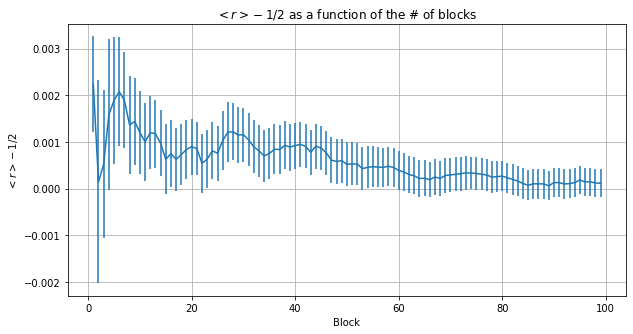

In [5]:
file=open("Es_lezione_01/dataEx1_1.dat")
line1=file.readline().split()
M=int(line1[0])
N=int(line1[1])
x=np.arange(1,N)
ave=np.zeros((2, N-1))
err=np.zeros((2, N-1))
i=0

for line in file.readlines():
    for j in range(2):
        ave[j, i]=float(line.split()[j])
        err[j, i]=float(line.split()[j+2])
    i+=1
    
file.close()
    
plt.errorbar(x, ave[0], yerr=err[0])
plt.xlabel('Block')
plt.ylabel('$< r >- 1/2$')
plt.title("$<r>-1/2$ as a function of the # of blocks")
plt.grid(True)
plt.rcParams["figure.figsize"]=(10,5)
plt.show()

After some initial oscillation, we note a stabilization of the estimation around the value 0 starting roughly from the 60-th block.

### - 01.2: expectation value of $\sigma^2$
The simulation is carried out without changing $M$ and $N$ from the previous point. We again plot the difference between each esitmation and the expected value.

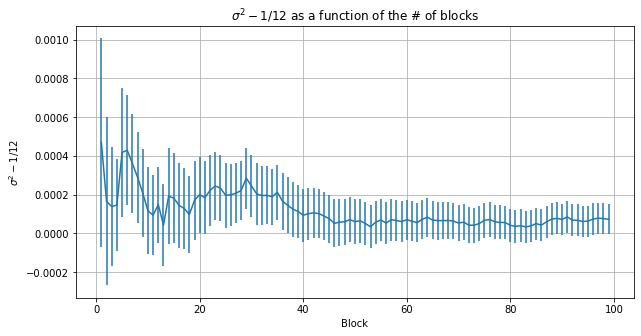

In [11]:
plt.errorbar(x,ave[1],yerr=err[1])
plt.xlabel('Block')
plt.ylabel('$\sigma^2 - 1/12$')
plt.title("$\sigma^2-1/12$ as a function of the # of blocks")
plt.grid(True)
plt.rcParams["figure.figsize"]=(10,5)
plt.show()

The stabilization of the estimation is faster than in the previous case and occurs after 40 blocks. Note that the scale on the y-axis is smaller than the one for $\langle r\rangle$ by roughly two orders of magnitude.

### - 01.3: uniformity of generator
The interval $[0,1]$ has been divided into $M=10^2$ sub-intervals of equal length and $M$ simulations with $n=10^4$ uniformly-distributed numbers each have been carried out. Thus the expected number of events per sub-interval is $n/M=10^2$. Then, on average, we expect $n_i-n/M\approx n/M$, thus $\chi^2\approx 100$.
We, then, plot $\chi^2_j-100$ for $j=1,\dots, M$.

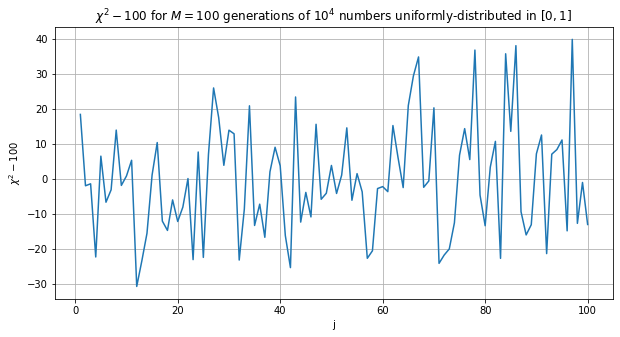

< \chi^2 > = 98.67603960396039
\sigma_{\chi^2} = 18.526588443768272


In [4]:
file=open("Es_lezione_01/dataEx1_2.dat")
data=[]
i=0

for line in file.readlines():
    data.append(float(line.split()[0]))
    i+=1

file.close()
    
x=list(range(1,i+1))
chi2=np.asarray(data)

plt.plot(x, chi2-100)
plt.xlabel("j")
plt.ylabel("$\chi^2-100$")
plt.title("$\chi^2-100$ for $M=100$ generations of $10^4$ numbers uniformly-distributed in $[0,1]$")
plt.grid(True)
plt.rcParams["figure.figsize"]=(10,5)
plt.show()

ave=0
ave2=0

for j in chi2:
    ave+=j
    ave2+=j**2
    
ave/=i+1
ave2/=i+1
rms=math.sqrt(ave2-ave**2)

print("< \chi^2 > = " + str(ave))
print("\sigma_{\chi^2} = " +  str(rms))
    

The plot shows an oscillation of $\chi^2-100$ around the expected value 0. All values lie within 40 units from 0. A straightforward computation of the average $\langle\chi^2\rangle$ with its uncertainty shows a good compatibility with $100$.

## Exercise 02
Exercise #2 is aimed at generating numbers from given probability distributions using the method of inversion of cumulative function and testing the Central Limit Theorem.

The three probability measures we are here taking into account are the uniform, exponential and Cauchy-Lorentz measures. Inversion of the cumulative functions yields the following formulas, where $x$ is a random variable uniformly distributed in $(0,1)$:
1. The variable $$y:=\inf \Omega+(\sup \Omega-\inf \Omega)x$$ is uniformly-distributed in the connected set $\Omega$.
2. The variabile $$y:=-\lambda^{-1}\log(1-x)$$ is exponentially-distributed in $(0,+\infty)$.
3. The variabile $$y:=\mu+\Gamma\tan\biggl[\pi \biggl(x-\frac{1}{2}\biggr)\biggr]$$ is Cauchy-Lorentz-distributed on the real line.

As for the Cental Limit Theorem, it states that, for every sequence of statistically-indipendent random variabiles $\{x_i\}$ distributed according to a same given probability distribution, provided that the second central moment (variance) $\sigma^2$ is finite, the limiting distribution for the sample average: $$S_N:=\frac{1}{N}\sum_{i=1}^Nx_i$$ is the normal distribution with the same expectation value as the original distribution and variance $\sigma^2/N$.

### Uniform distribution
We want to replicate the outcome of a simple experiment in which one rolls a dice $10^4$ times. If the dice is unloaded, one expects to find a uniform (discrete) distribution between 1 and 6, i.e. every face is equally likely to come up with each roll. For simplicity sake, our distribution will be continuous.
We will plot in an histogram first $10^4$ numbers obtained with the above method, then we will test the Central Limit Theorem by plotting $S_N$ for $N=2,10,100$; since the uniform distribution has finite $\sigma^2$ (see Ex01.2), we expect the Theorem to hold.

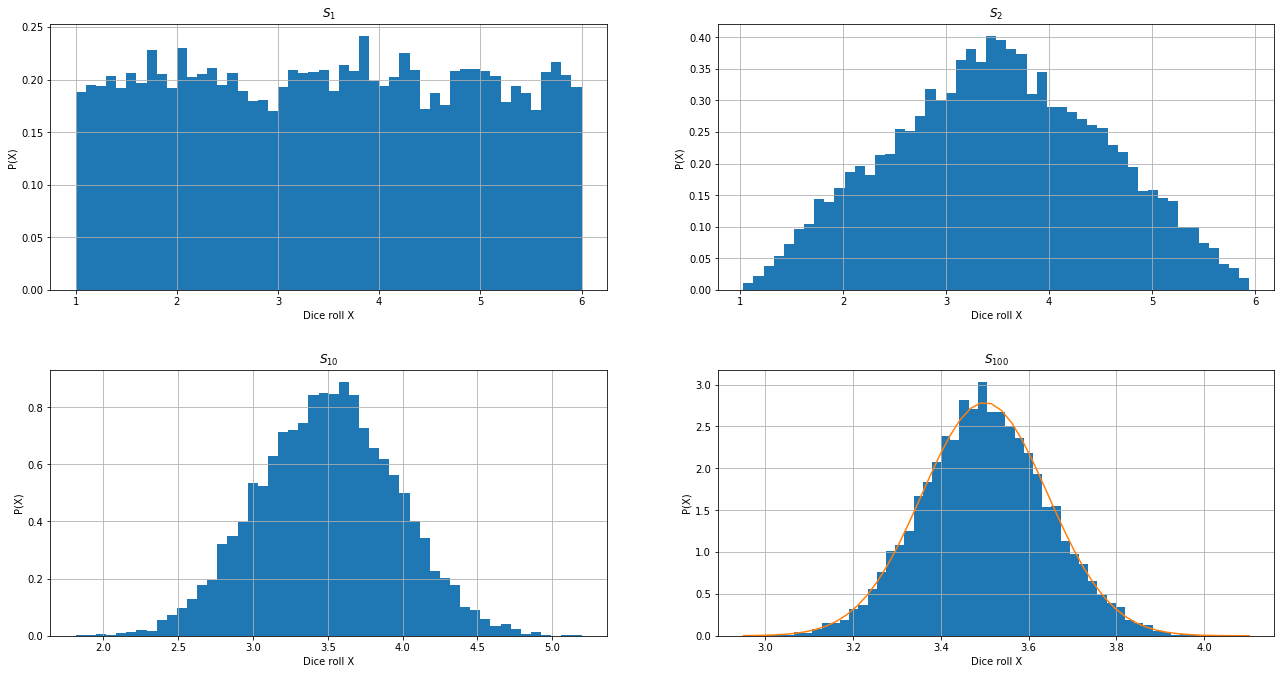

Fit parameters:
\mu = 3.500571871
\sigma = 0.14318718017912554


In [5]:
import scipy.stats as ss

file=open("Es_lezione_01/dataEx2.dat")
N=10000
unif=np.zeros((4, N))
exp=np.zeros((4, N))
cauchy=np.zeros((4, N))
k=0

for line in file.readlines():
    appo=line.split()
    j=0
    for i in range(0,len(appo),3):
        unif[j, k]=float(appo[i])
        exp[j, k]=float(appo[i+1])
        cauchy[j, k]=float(appo[i+2])
        j+=1
    k+=1
    
file.close()

n_bins = 50
f, h=plt.subplots(2,2)
titles=['$S_1$', '$S_2$', '$S_{10}$', '$S_{100}$']
k=0

for i in range(2):
    for j in range(2):
        h[i,j].hist(unif[k], n_bins, density=True)
        h[i,j].set(xlabel='Dice roll X', ylabel='P(X)')
        h[i,j].grid(True)
        h[i,j].set_title(titles[k])
        k+=1
        
plt.subplots_adjust(left=0.3, bottom=-0.5, right=2, top=1.2, wspace=0.2, hspace=0.3)

P=ss.norm.fit(unif[3])
x=np.linspace(plt.xlim()[0], plt.xlim()[1], n_bins)
y=ss.norm.pdf(x, P[0], P[1])
plt.plot(x, y)

plt.show()
print("Fit parameters:")
print("\mu = " + str(P[0]))
print("\sigma = " + str(P[1]))

The histograms show visually that, as $N$ grows, the 'shape' of the distribution gets more and more similar to a gaussian. A more quantitative approach is attempted by fitting $S_{100}$ with a normal distribution: according to CLT we should expect:
$$\mu=\dfrac{1}{5}\int_1^6x\,dx=\dfrac{7}{2}=3.5$$
$$N\sigma^2_N=\dfrac{1}{5}\int_1^6\bigl(x-\mu\bigr)^2\,dx=\dfrac{25}{12}$$
i.e. $\sigma_{100}=\frac{1}{4\sqrt{3}}\approx 0.144 $. In both cases the fit yields parameters in close agreement with those expected values.

### Exponential distribution
Here we replicate an experiment with a loaded dice whose outcome is exponentially distributed with $\lambda=1$ (of course this is not realistic because we would need a dice with an infinite number of faces). The number of throws in unchanged wrt to the previous 'experiment' with the unloaded dice ($10^4$). We plot $S_1, S_2, S_{10}$ and $S_{100}$ in histograms.

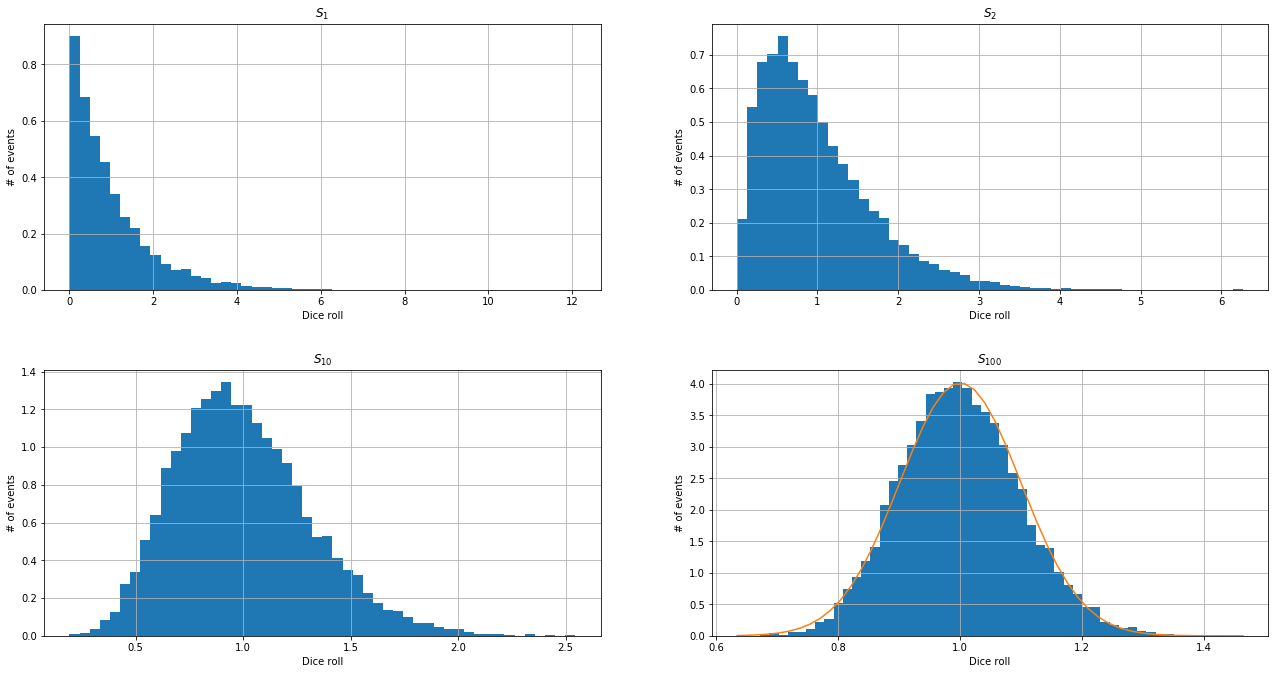

Fit parameters:
\mu = 1.0007401928000002
\sigma = 0.09945145284073144


In [6]:
f, h1=plt.subplots(2,2)
k=0

for i in range(2):
    for j in range(2):
        h1[i,j].hist(exp[k], n_bins, density=True)
        h1[i,j].set(xlabel='Dice roll', ylabel='# of events')
        h1[i,j].grid(True)
        h1[i,j].set_title(titles[k])
        k+=1
        
plt.subplots_adjust(left=0.3, bottom=-0.5, right=2, top=1.2, wspace=0.2, hspace=0.3)

P=ss.norm.fit(exp[3])
x=np.linspace(plt.xlim()[0], plt.xlim()[1], n_bins)
y=ss.norm.pdf(x, P[0], P[1])
plt.plot(x, y)

plt.show()
print("Fit parameters:")
print("\mu = " + str(P[0]))
print("\sigma = " + str(P[1]))

Once again the shape of the histograms resembles more and more that of a gaussian distribution as $N$ increases. Fitting $S_{100}$ with a normal distribution gives the values written above, which are in close agreement with the expected $\mu=\lambda^{-1}=1$ and $$N\sigma^2_N=\langle x^2\rangle-\dfrac{1}{\lambda^2}=\dfrac{1}{\lambda^2}=1$$ i.e. $\sigma_{100}=0.1$.

### Cauchy-Lorentz distribution
We now turn to a more irrealistic experiment involving a loaded dice whose outcome is Lorentzian-distributed around the mean value $\mu=0$ (a dice which can yield negative numbers, to my knowledge, doesn't exist) with $\Gamma=1$. Nonetheless, such experiment is very much intriguing because the Cauchy-Lorentz distribution has infinite second central moment (as one can immediately understand by realising that $x^2\rho_{CL}\not\in L^1(\mathbb{R})$), thus it is expected that the sample $S_N$ doesn't have the normal distribution as a limit. In fact, the Central Limit Theorem turns out to be just a special case of the more general Theorem by Levy and Khintchine. According to this result,we should expect that the sample average limit distribution for the Cauchy-Lorentz measure is still Cauchy-Lorentz with the same parameters.

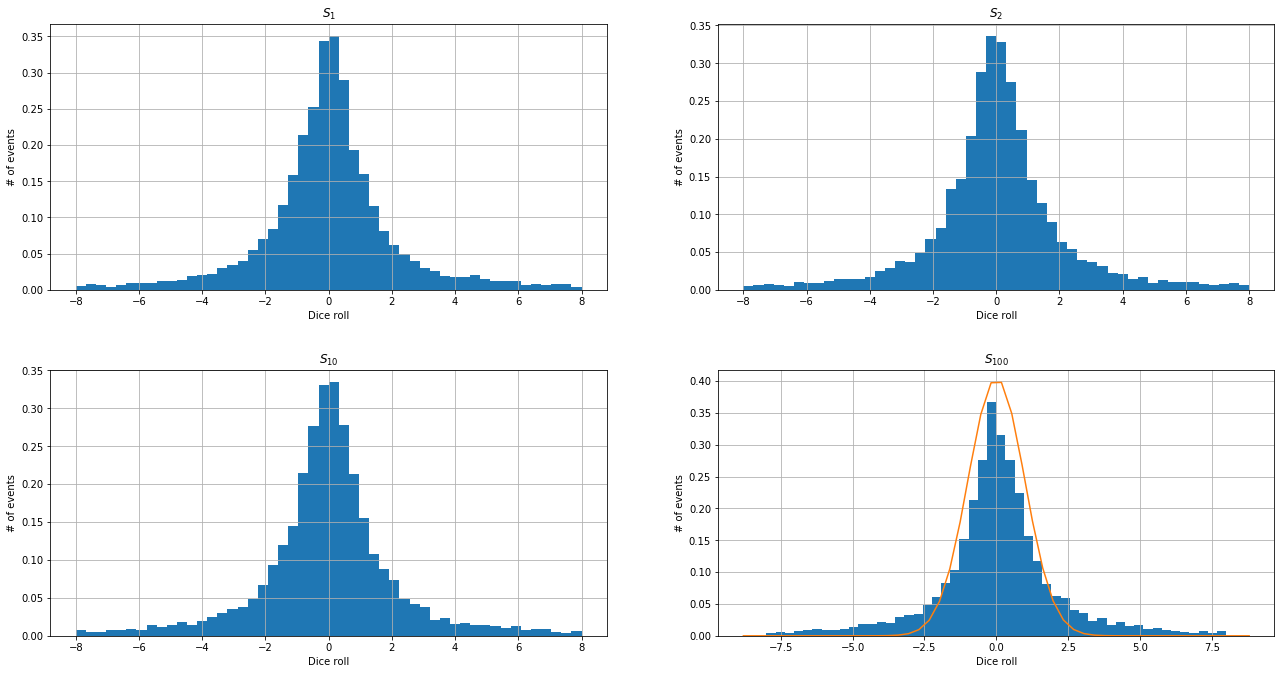

Fit parameters:
\mu = 0.003942008183203119
\Gamma = 0.9870974335937499


In [7]:
def L(x,gamma,mu): # fitting Cauchy-Lorentz function
    return 1/math.pi*gamma/(gamma**2+(x-mu)**2) 

f, h2=plt.subplots(2,2)
k=0

for i in range(2):
    for j in range(2):
        h2[i,j].hist(cauchy[k], n_bins, range=(-8,8), density=True)
        h2[i,j].set(xlabel='Dice roll', ylabel='# of events')
        h2[i,j].grid(True)
        h2[i,j].set_title(titles[k])
        k+=1
        
plt.subplots_adjust(left=0.3, bottom=-0.5, right=2, top=1.2, wspace=0.2, hspace=0.3)

P=ss.cauchy.fit(cauchy[3])
x=np.linspace(plt.xlim()[0], plt.xlim()[1], n_bins)
y=ss.norm.pdf(x, P[0], P[1])
plt.plot(x, y)

plt.show()
print("Fit parameters:")
print("\mu = " + str(P[0]))
print("\Gamma = "+ str(P[1]))

Visually we see that the shape of the distribution is roughly unchanged as $N$ increases. Fitting $S_{100}$ with a Cauchy-Lorentz distribution gives parameters in close agreement with the expected values $\mu=0$ and $\Gamma=1$.

## Exercise 3
The aim of the exercise is to estimate the value of $\pi$ with Buffon's method of throwing a needle onto a plane equipped equally-spaced lines parallel to one another. For clarity sake, let $L$ be the length of the needle, $x$ the direction of the rods (and $y$ the one perpendicular to it), $d$ the minimum distance bewtween each pair. The plane is invariant for discrete translations in the $y$-directions of integers multiple of $d$. This symmetry saves us some effort because we need not specify the total length of the plane since every point $P$ of coordinates $(x,y)$ in the system defined above which lies in the stripe $\mathbb{R}\times (nd, (n+1)d)$ for some $n\in\mathbb{Z}$ is equivalent to a point in the stripe $\mathbb{R}\times (0,d)$. Furthermore, the $x$-component of the position of a chosen vertex of the needle after a throw is completely irrelevant: we only need to know its $y$-component and the angle $\varphi$ between the needle and a selected axis (e.g. $x$) to check whether $y+L\sin\varphi\not\in(0,d)$, only if that is the case the needle intersects one rod.
Our experiment is thus reduced to generating a couple of numbers $(y,\varphi)$ respectively taken from a uniform distribution between $(0,L)$ and $(-\pi,\pi)$. 

We now see there's an evident flaw in the procedure presented so far: the generation of $\varphi$ requires the knowledge of the number we are about to estimate ($\pi$). That is of course nonsense. A plausible way to produce the angle without using $\pi$ is considering a subset of the plane $\mathbb{R}^2$ made up of points whose polar angle is uniformly distributed in the desired interval, which is a different way to call a circle (the radius in irrelevant, so we set it to one). We, then, generate a couple $(\xi,\eta)\in [-1,+1]^2$, we check whether it lies in the circle (i.e. if $\xi^2+\eta^2<1$) and, if it does, we "extract" its polar angle.

We run $M=10^6$ simulations and divide them into $N=10^2$ blocks in order to compute the statistical uncertainties via blocking method.

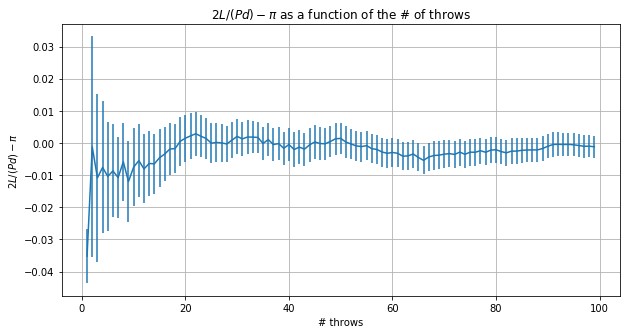

In [12]:
file=open("Es_lezione_01/dataEx3.dat")
line1=file.readline().split()
M=int(line1[0])
N=int(line1[1])
x=np.arange(1,N)
ave=np.zeros(N-1)
err=np.zeros(N-1)
i=0

for line in file.readlines():
    ave[i]=float(line.split()[0])
    err[i]=float(line.split()[1])
    i+=1
    
file.close()

plt.errorbar(x, ave, yerr=err)
plt.grid(True)
plt.title("$2L/(Pd)-\pi$ as a function of the # of throws")
plt.xlabel("# throws")
plt.ylabel("$2L/(Pd)-\pi$")
plt.show()

The oscillation of the 'measured' quantity before it settles at 0 is shorter than in the first simulations of these same sheet. However, note also from the scaling of the y-axis and the error bars that the estimation is much coarser than the previous simulations.